<a href="https://colab.research.google.com/github/kanishk16/routetoMIDASS/blob/master/CV_Problem/CV_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount the drive for saving directly to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import PIL
print(PIL.PILLOW_VERSION)
# we need pillow version of 5.3.0
# we will uninstall the older version first
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==4.1.1
# import the new one
import PIL
print(PIL.PILLOW_VERSION)

4.1.1
Uninstalling Pillow-4.1.1:
  Successfully uninstalled Pillow-4.1.1
    100% |████████████████████████████████| 5.7MB 6.6MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.


4.1.1


In [0]:
# Imports 
import numpy as np
import torch
import pickle
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

### Defining the directories n Loading the data the from .pkl file

In [0]:
data_dir = '/content/'
train_lab_dir = data_dir + 'train_label.pkl'
train_dir = data_dir + 'train_image.pkl'
test_dir = data_dir + 'test_image.pkl'

In [0]:
!realpath train_data_set
print(train_dir)

/content/train_data_set
/content/train_image.pkl


In [7]:
# load images from pkl file

with open(train_dir,"rb") as f:
  train_data = pickle.load(f)
print(type(train_data))
print(len(train_data[0]))
print(len(train_data))

<class 'list'>
784
8000


In [5]:
# load images from pkl file

with open(test_dir,"rb") as f:
  test_data = pickle.load(f)
print(type(test_data))
print(len(test_data[0]))
print(len(test_data))

<class 'list'>
784
2000


In [6]:
with open(train_lab_dir,"rb") as f:
  train_lab = pickle.load(f)
  print(train_lab)
print(type(train_lab))
print(len(train_lab))
print(set(train_lab))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Probably these are a set of grey-scale images (28x28x1) but the possibility of CMYK (14x14x4) cannot be ruled out completely..

### Visualizing the Images!!

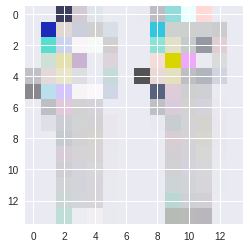

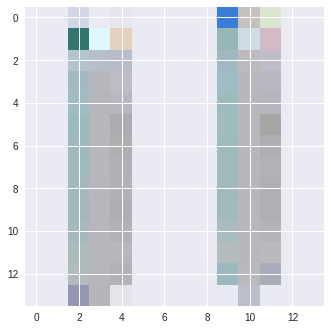

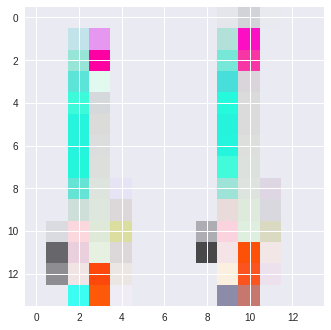

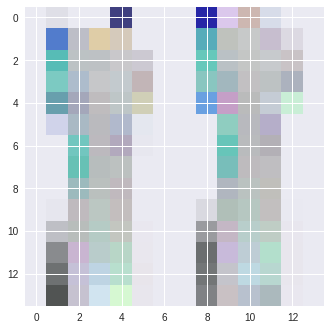

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4))
for ii in range(4):
  vtrain_data = np.array(train_data[ii]).reshape(14,14,4)
  plt.imshow(vtrain_data)
  plt.show()

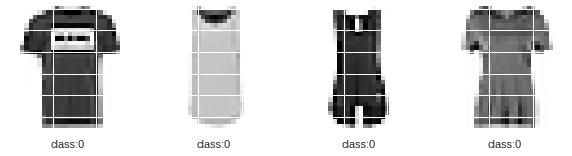

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
  vtrain_data = np.array(train_data[ii]).reshape(28,28)
  ax = axes[ii]
  ax.imshow(vtrain_data)
  ax.set_xticklabels('')
  ax.set_yticklabels('')
  ax.set_xlabel("class:" + str(train_lab[ii]))
  #plt.show()

####Convert data from type < LIST > to < NDARRAY>

In [9]:
itrain_data = np.array(train_data).reshape((len(train_data),28,28,1))
#itrain_data.reshape((itrain_data.shape[0],28,28,1))  
print(itrain_data.shape)
  
itest_data = np.array(test_data).reshape((len(test_data),28,28,1))
  #itrain_lab = np.array(train_lab[iii]).reshape(28,28)
print(itest_data.shape)

vtrain_lab = np.array(train_lab).reshape(-1)
vtrain_lab[vtrain_lab == 2] = 1
vtrain_lab[vtrain_lab == 3] = 2
vtrain_lab[vtrain_lab == 6] = 3

#print(itrain_lab.reshape(-1))
print(vtrain_lab)

(8000, 28, 28, 1)
(2000, 28, 28, 1)
[0 0 0 ... 3 3 3]


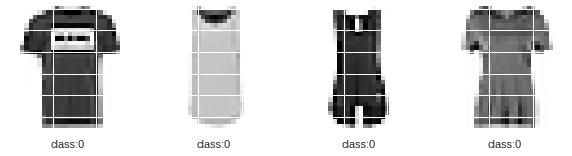

In [10]:
#Confirmimg NO CHANGES while RESHAPING
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
  vtrain_data = itrain_data[ii,:,:].reshape(28,28)
  ax = axes[ii]
  ax.imshow(vtrain_data)
  ax.set_xticklabels('')
  ax.set_yticklabels('')
  ax.set_xlabel("class:" + str(vtrain_lab[ii]))
  #plt.show()

#### Splitting the TRAINING SET into TRAIN and VALIDATION

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(itrain_data/255, vtrain_lab, test_size=0.20, shuffle=True)

### DATA AUGMENTATION 

>Applied only for the training dataset to Normalize the images as well as to avoid Overfitting

>Though the basic transforms are defined for both train_set and test_set to bring uniformity to all the images

In [0]:
# Define transforms for the training and validation sets
train_transforms =  transforms.Compose([transforms.ToPILImage(),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])


In [0]:
valid_transforms =  transforms.Compose([transforms.ToPILImage(),
                              #transforms.Resize(225),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize([0.485, 0.456, 0.406], 
                                                   [0.229, 0.224, 0.225])])


### Defining the dataset and dataloaders

In [0]:
train_x = torch.stack([train_transforms(torch.Tensor(i)) for i in x_train]) 
train_y = torch.stack([torch.Tensor(i) for i in y_train.reshape(-1,1)])

train_dataset = torch.utils.data.TensorDataset(train_x,train_y)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


In [0]:
valid_x = torch.stack([valid_transforms(torch.Tensor(i)) for i in x_valid]) 
valid_y = torch.stack([torch.Tensor(i) for i in y_valid.reshape(-1,1)])

valid_dataset = torch.utils.data.TensorDataset(valid_x,valid_y)
validloader = torch.utils.data.DataLoader(valid_dataset, batch_size = 32, shuffle=True)

### Building the CLASSIFIER using TRANSFER LEARNING

> 1. Load a pretrained network (ResNet-18)
> 2. Freeze its parameters in order to not to backpropagate through them

In [0]:
# Using a pre-trained model
model = models.resnet18(pretrained=True)

# Freeze parameters so we don't backprop through them
#for param in model.parameters():
#    param.requires_grad = False

In [17]:
# Note the last LAYER of the model 
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

>3. Define a new, untrained feed-forward network as a classifier, using ReLU activation function and dropout 
>4. Feed-forward network should be designed in such a way that it has the same out_features corresponding to the in_features in linear layer in our classifier

In [0]:
from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(512, 4)),
                          #('relu', nn.ReLU()),
                          #('dropout',nn.Dropout(p=0.2)),
                          #('fc2', nn.Linear(256, 4)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

>5. Attatch the pre-trained model with our created classifier.

In [36]:
model.fc = classifier

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

>6. Move tensors to GPU if CUDA available 
>7. Define Criterion and Optimizer


In [37]:
# Enabling CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.01)

model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

>8. Train the classifier layers using backpropagation using the pre-trained network to get the features

>9. Track the loss and accuracy on the validation set to determine the best hyperparameters

>10. Save the model as soon as Validation Loss decreases

In [39]:
n_epochs = 50
steps = 0

valid_loss_min = np.inf

train_losses, valid_losses = [], []

# keep track of training and validation loss
train_loss = 0.0
valid_loss = 0.0

for epoch in range(1, n_epochs+1):
    running_loss = 0
    model.train()
    for images, labels in trainloader:
        
        images, labels = images.to(device), labels.to(device).long().reshape(-1)
        
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loss += loss.item()*images.size(0)
        
        ## TODO: Implement the validation pass and print out the validation accuracy
    accuracy = 0
    #test_loss = 0
        
    with torch.no_grad():
      model.eval()
      for images, labels in validloader:
        images, labels = images.to(device), labels.to(device).long().reshape(-1)
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #test_loss += loss.item()
        valid_loss += loss.item()*images.size(0)
            
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))  
        
    train_losses.append(running_loss/len(trainloader))
    valid_losses.append(valid_loss/len(validloader))
                
    # calculate average losses
    train_loss = train_loss/len(trainloader.dataset)
    valid_loss = valid_loss/len(validloader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {}\{} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.3f}'.format(epoch, n_epochs, train_loss, valid_loss, accuracy/len(validloader)))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(), '/content/gdrive/My Drive/Colab Notebooks/Image_Classifier Models/midass03.pt')
        valid_loss_min = valid_loss
 

       

Epoch: 1\50 	Training Loss: 1.677628 	Validation Loss: 1.753011 	Validation Accuracy: 0.254
Validation loss decreased (inf --> 1.753011).  Saving model ...
Epoch: 2\50 	Training Loss: 1.616407 	Validation Loss: 1.807605 	Validation Accuracy: 0.257
Epoch: 3\50 	Training Loss: 1.677400 	Validation Loss: 1.931000 	Validation Accuracy: 0.257
Epoch: 4\50 	Training Loss: 1.564702 	Validation Loss: 2.806706 	Validation Accuracy: 0.237
Epoch: 5\50 	Training Loss: 1.645317 	Validation Loss: 1.575354 	Validation Accuracy: 0.241
Validation loss decreased (1.753011 --> 1.575354).  Saving model ...
Epoch: 6\50 	Training Loss: 1.600330 	Validation Loss: 1.412424 	Validation Accuracy: 0.289
Validation loss decreased (1.575354 --> 1.412424).  Saving model ...
Epoch: 7\50 	Training Loss: 1.571326 	Validation Loss: 1.392538 	Validation Accuracy: 0.261
Validation loss decreased (1.412424 --> 1.392538).  Saving model ...
Epoch: 8\50 	Training Loss: 1.674432 	Validation Loss: 2.350415 	Validation Accuracy:

KeyboardInterrupt: ignored

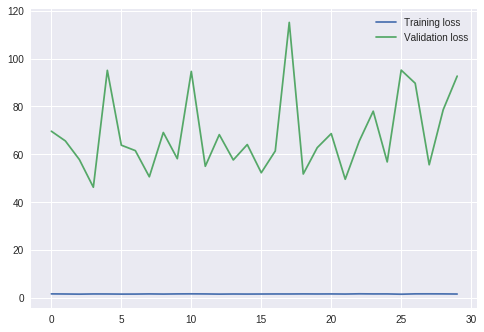

In [38]:
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

#### Experiment 02: Changing the MODEL since the results were 

```
removed the linear layer
```

